In [ ]:
# Importing required libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression ,LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Data Exploration

Defining a function for downloading the historic prices of a stock to make the code reusable

In [ ]:
#Function to download Data from Yahoo finance
def get_stock_data(ticker, start_date, end_date):
    # Download historical data as a pandas DataFrame
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Print the first few rows of the DataFrame
    print(stock_data.head())

    # Save the DataFrame to a CSV file
    stock_data.to_csv(f"{ticker}_stock_data.csv")

    return stock_data

In [ ]:
#Download historioric prices of any stock by replacing the ticker_symbol
ticker_symbol = "AAPL"
start_date = "2017-01-01"
end_date = "2023-01-01"

get_stock_data(ticker_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-01-03  28.950001  29.082500  28.690001  29.037500  27.023706  115127600
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.993462   84472400
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.130730   88774400
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.433195  127007600
2017-01-09  29.487499  29.857500  29.485001  29.747499  27.684465  134247600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.023706,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.993462,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.130730,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.433195,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.684465,134247600
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400


In [ ]:
AAPL = pd.read_csv("/content/AAPL_stock_data.csv", index_col=0)
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.023706,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.993462,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.130730,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.433195,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.684465,134247600
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400


In [ ]:
stock_data = AAPL[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']]
stock_data.head(10)

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2017-01-03,27.023706,28.950001,29.082500,28.690001,29.037500,115127600
2017-01-04,26.993462,28.962500,29.127501,28.937500,29.004999,84472400
2017-01-05,27.130730,28.980000,29.215000,28.952499,29.152500,88774400
2017-01-06,27.433195,29.195000,29.540001,29.117500,29.477501,127007600
2017-01-09,27.684465,29.487499,29.857500,29.485001,29.747499,134247600
2017-01-10,27.712385,29.692499,29.844999,29.575001,29.777500,97848400
2017-01-11,27.861288,29.684999,29.982500,29.650000,29.937500,110354400
2017-01-12,27.744959,29.725000,29.825001,29.552500,29.812500,108344800
2017-01-13,27.696100,29.777500,29.905001,29.702499,29.760000,104447600


In [ ]:
#We intend to train the models on five years of data and try to predict values for the next year
print("There training data would have "+ str(stock_data[:'2021'].shape[0]) + " observations")
print("There training data would have "+ str(stock_data['2022':].shape[0]) + " observations")

There training data would have 1007 observations
There training data would have 251 observations


<Axes: xlabel='Date'>

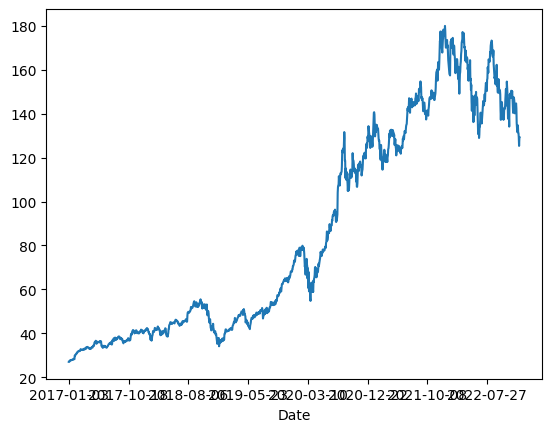

In [ ]:
stock_data['Adj Close'].plot()

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 2017-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1510 non-null   float64
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.9+ KB


In [ ]:
stock_data.describe()

,Adj Close,Open,High,Low,Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,86.148936,87.985631,89.017182,86.989507,88.043733,1.154939e+08
std,48.095131,47.914502,48.557898,47.260037,47.926708,5.360436e+07
min,26.993462,28.950001,29.082500,28.690001,29.004999,3.519590e+07
25%,41.927324,43.870625,44.346875,43.630001,43.989376,8.045750e+07
50%,65.032421,66.692501,67.508751,65.960003,66.752502,1.013840e+08
75%,134.052582,135.812500,137.265003,133.760002,135.384998,1.342665e+08
max,179.953888,182.630005,182.940002,179.119995,182.009995,4.479400e+08


# Data Preprocessing

Defining a function to split the data into training and testing datasets.

In [ ]:
def train_test_split(stock_data,time_steps,for_periods):

    # time_steps: # of the input time steps
    # for_periods: # of the output time steps

    # create training and test set
    first_five_years = stock_data[:'2021'].iloc[:,0:1].values
    next_year = stock_data['2022':].iloc[:,0:1].values
    first_five_years_len = len(first_five_years)
    next_year_len = len(next_year)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,first_five_years_len-1):
        X_train.append(first_five_years[i-time_steps:i,0])
        y_train.append(first_five_years[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    # Preparing to create X_test
    inputs = pd.concat((stock_data["Adj Close"][:'2022'], stock_data["Adj Close"]['2023':]),axis=0).values
    inputs = inputs[len(inputs)-len(next_year) - time_steps:]
    inputs = inputs.reshape(-1,1)

    X_test = []
    for i in range(time_steps,next_year_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test


In [ ]:
X_train, y_train, X_test = train_test_split(stock_data,5,2)
X_train.shape[0],X_train.shape[1]

(1001, 5)

In [ ]:
X_train, y_train, X_test = train_test_split(stock_data,5,2)
X_train.shape[0],X_train.shape[1]

(1001, 5)

In [ ]:
X_train

array([[[ 27.02370834],
        [ 26.99345589],
        [ 27.13073158],
        [ 27.43319702],
        [ 27.68446159]],

       [[ 26.99345589],
        [ 27.13073158],
        [ 27.43319702],
        [ 27.68446159],
        [ 27.71238518]],

       [[ 27.13073158],
        [ 27.43319702],
        [ 27.68446159],
        [ 27.71238518],
        [ 27.86128807]],

       ...,

       [[124.46188354],
        [126.00463867],
        [129.59129333],
        [128.68725586],
        [129.67973328]],

       [[126.00463867],
        [129.59129333],
        [128.68725586],
        [129.67973328],
        [134.31784058]],

       [[129.59129333],
        [128.68725586],
        [129.67973328],
        [134.31784058],
        [132.52940369]]])

In [ ]:
y_train

array([[ 27.71238518,  27.86128807],
       [ 27.86128807,  27.74495316],
       [ 27.74495316,  27.69610405],
       ...,
       [134.31784058, 132.52940369],
       [132.52940369, 131.39935303],
       [131.39935303, 130.38725281]])

In [ ]:
X_test

array([[[134.31784058],
        [132.52940369],
        [131.39935303],
        [130.38725281],
        [127.16416168]],

       [[132.52940369],
        [131.39935303],
        [130.38725281],
        [127.16416168],
        [128.7363739 ]],

       [[131.39935303],
        [130.38725281],
        [127.16416168],
        [128.7363739 ],
        [124.40294647]],

       ...,

       [[169.20669556],
        [167.8323822 ],
        [171.03579712],
        [173.65585327],
        [174.28863525]],

       [[167.8323822 ],
        [171.03579712],
        [173.65585327],
        [174.28863525],
        [178.29286194]],

       [[171.03579712],
        [173.65585327],
        [174.28863525],
        [178.29286194],
        [177.26463318]]])

In [ ]:
#Examining the train_test_split function
df_X_train = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
df_y_train = pd.DataFrame(y_train)
pd.concat([df_X_train,df_y_train],axis=1)

# Convert the 3-D shape of X_test to a data frame so we can see:
df_X_test = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(df_X_test)


,0,1,2,3,4
0,134.317825,132.529388,131.399368,130.387253,127.164146
1,132.529388,131.399368,130.387253,127.164146,128.736389
2,131.399368,130.387253,127.164146,128.736389,124.402924
3,130.387253,127.164146,128.736389,124.402924,128.647934
4,127.164146,128.736389,124.402924,128.647934,129.758331
...,...,...,...,...,...
244,177.274521,170.314026,169.206696,167.832397,171.035782
245,170.314026,169.206696,167.832397,171.035782,173.655838
246,169.206696,167.832397,171.035782,173.655838,174.288635
247,167.832397,171.035782,173.655838,174.288635,178.292877


In [ ]:
df_X_test

,0,1,2,3,4
0,134.317825,132.529388,131.399368,130.387253,127.164146
1,132.529388,131.399368,130.387253,127.164146,128.736389
2,131.399368,130.387253,127.164146,128.736389,124.402924
3,130.387253,127.164146,128.736389,124.402924,128.647934
4,127.164146,128.736389,124.402924,128.647934,129.758331
...,...,...,...,...,...
244,177.274521,170.314026,169.206696,167.832397,171.035782
245,170.314026,169.206696,167.832397,171.035782,173.655838
246,169.206696,167.832397,171.035782,173.655838,174.288635
247,167.832397,171.035782,173.655838,174.288635,178.292877


In [ ]:
df_X_train

,0,1,2,3,4
0,27.023706,26.993462,27.130730,27.433195,27.684465
1,26.993462,27.130730,27.433195,27.684465,27.712385
2,27.130730,27.433195,27.684465,27.712385,27.861288
3,27.433195,27.684465,27.712385,27.861288,27.744959
4,27.684465,27.712385,27.861288,27.744959,27.696100
...,...,...,...,...,...
996,125.591942,126.466476,124.461891,126.004623,129.591309
997,126.466476,124.461891,126.004623,129.591309,128.687256
998,124.461891,126.004623,129.591309,128.687256,129.679733
999,126.004623,129.591309,128.687256,129.679733,134.317825


In [ ]:
df_y_train

,0,1
0,27.712385,27.861288
1,27.861288,27.744959
2,27.744959,27.696100
3,27.696100,27.919455
4,27.919455,27.917130
...,...,...
996,128.687256,129.679733
997,129.679733,134.317825
998,134.317825,132.529388
999,132.529388,131.399368


AS part of the pre processing steps it is necssary to scale the data. A Min Max Scaler can be added to the train_test_split function

In [ ]:
def train_test_split_normalize(stock_data,time_steps,for_periods):

    # create training and test set using 2017 - Dec 2021 as training data and 2022-2023 as the test data
    first_five_years = stock_data[:'2021'].iloc[:,0:1].values
    next_year  = stock_data['2022':].iloc[:,0:1].values
    first_five_years_len = len(first_five_years)
    next_year_len = len(next_year)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    first_five_years_scaled = sc.fit_transform(first_five_years)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,first_five_years_len-1):
        X_train.append(first_five_years_scaled[i-time_steps:i,0])
        y_train.append(first_five_years_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((stock_data["Adj Close"][:'2021'], stock_data["Adj Close"]['2022':]),axis=0).values
    inputs = inputs[len(inputs)-len(next_year) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,next_year_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

# Model Evaluation Metrics

In [ ]:
def actual_pred_plot(preds):
    #plot the predicted values against the actual values
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = stock_data.loc['2022':,'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))

    return (m.result().numpy(), actual_pred.plot() )


In [ ]:
def evaluation_metrics(preds):
    # Evaluating the model performance
    actual_pred = pd.DataFrame(columns=['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = stock_data.loc['2022':, 'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:, 0]

    mse = mean_squared_error(actual_pred['Adj. Close'], actual_pred['prediction'])
    mae = mean_absolute_error(actual_pred['Adj. Close'], actual_pred['prediction'])
    rmse = np.sqrt(mse)

    # Calculate R-squared (R2) score
    r2 = r2_score(actual_pred['Adj. Close'], actual_pred['prediction'])

    # Return evaluation metrics as a dictionary
    evaluation_results = {
        "Mean Squared Error (MSE)": mse,
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (R2) Score": r2,

    }

    return evaluation_results

#Regression Models for stock prediction

In [ ]:
X_train, y_train, X_test, sc = train_test_split_normalize(stock_data,5,1)

In [ ]:
#
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]))

# Convert the 3-D shape of X_test to an array
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))



In [ ]:
X_train

array([[2.81878687e-04, 0.00000000e+00, 1.27907275e-03, 4.09730870e-03,
        6.43847816e-03],
       [0.00000000e+00, 1.27907275e-03, 4.09730870e-03, 6.43847816e-03,
        6.69865747e-03],
       [1.27907275e-03, 4.09730870e-03, 6.43847816e-03, 6.69865747e-03,
        8.08606717e-03],
       ...,
       [9.08166657e-01, 9.22541350e-01, 9.55960174e-01, 9.47536762e-01,
        9.56784217e-01],
       [9.22541350e-01, 9.55960174e-01, 9.47536762e-01, 9.56784217e-01,
        1.00000000e+00],
       [9.55960174e-01, 9.47536762e-01, 9.56784217e-01, 1.00000000e+00,
        9.83336155e-01]])

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred = sc.inverse_transform(y_pred)

(21.826586, <Axes: xlabel='Date'>)

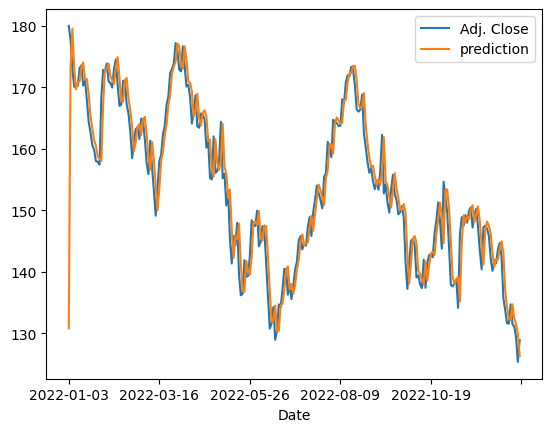

In [ ]:
actual_pred_plot(y_pred)

In [ ]:
evaluation_metrics(y_pred)

{'Mean Squared Error (MSE)': 21.826582688685903,
 'Mean Absolute Error (MAE)': 2.9535133478993485,
 'Root Mean Squared Error (RMSE)': 4.671892837885507,
 'R-squared (R2) Score': 0.8642664102689781}

In [ ]:
ridge_model = Ridge()

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

y_pred = sc.inverse_transform(y_pred)

(32.551914, <Axes: xlabel='Date'>)

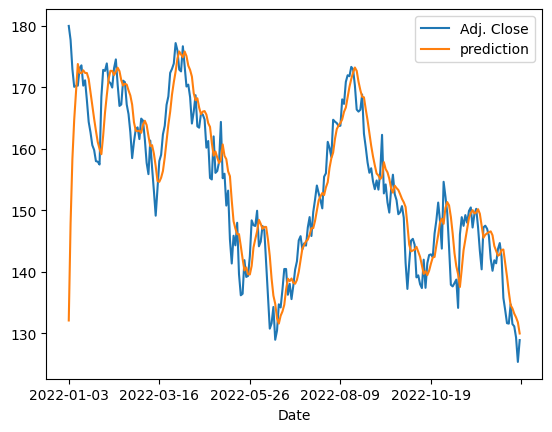

In [ ]:
actual_pred_plot(y_pred)

In [ ]:
evaluation_metrics(y_pred)

{'Mean Squared Error (MSE)': 32.55191478040892,
 'Mean Absolute Error (MAE)': 3.9120987475665423,
 'Root Mean Squared Error (RMSE)': 5.705428536088146,
 'R-squared (R2) Score': 0.7975684829465521}

In [ ]:
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
print("Rigid Regressor Best Hyperparameters:", best_params)

Rigid Regressor Best Hyperparameters: {'alpha': 0.1, 'solver': 'sag'}


In [ ]:
y_pred = best_model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)

(23.731895, <Axes: xlabel='Date'>)

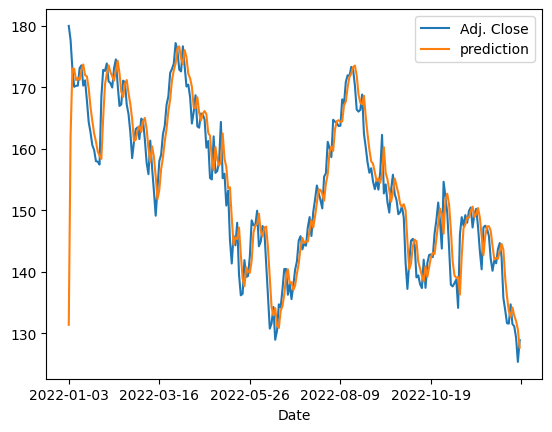

In [ ]:
actual_pred_plot(y_pred)

In [ ]:
evaluation_metrics(y_pred)

{'Mean Squared Error (MSE)': 23.731894037768452,
 'Mean Absolute Error (MAE)': 3.1941953063422397,
 'Root Mean Squared Error (RMSE)': 4.8715391856956725,
 'R-squared (R2) Score': 0.8524177964637448}

# Recurrent Neural Networks

The layers which have commented out of the code are layers tested while evaluating the best model.

In [ ]:
X_train, y_train, X_test, sc = train_test_split_normalize(stock_data,5,1)

In [ ]:
def rnn_model(X_train, y_train, X_test, sc):
    #Create the the rnn model and train on the train data then make predictions on X_test
    # create a model
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(32, return_sequences=True))
    #rnn_model.add(SimpleRNN(32, return_sequences=True))
    #rnn_model.add(SimpleRNN(32, return_sequences=True))
    rnn_model.add(SimpleRNN(32))
    rnn_model.add(Dense(2)) # The time step of the output

    rnn_model.compile(optimizer='adam', loss='mean_squared_error')

    validation_data = (X_train[-252:], y_train[-252:])

    # fit the RNN model
    rnn_model.fit(X_train, y_train, epochs=100, batch_size=21, validation_data=validation_data)

    # Finalizing predictions
    rnn_predictions = rnn_model.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions = sc.inverse_transform(rnn_predictions)

    return rnn_model, rnn_predictions


In [ ]:
rnn_model1, rnn_predictions_2 = rnn_model(X_train, y_train, X_test, sc)

Epoch 1/100
48/48 [==============================] - 4s 18ms/step - loss: 0.0101 - val_loss: 0.0035
Epoch 2/100
48/48 [==============================] - 0s 10ms/step - loss: 9.7537e-04 - val_loss: 0.0021
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 6.8775e-04 - val_loss: 0.0022
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 5.9838e-04 - val_loss: 0.0015
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 4.5108e-04 - val_loss: 0.0012
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 5.5539e-04 - val_loss: 0.0013
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 3.7272e-04 - val_loss: 9.1395e-04
Epoch 8/100
48/48 [==============================] - 0s 6ms/step - loss: 3.3853e-04 - val_loss: 8.4114e-04
Epoch 9/100
48/48 [==============================] - 0s 5ms/step - loss: 2.8218e-04 - val_loss: 9.2505e-04
Epoch 10/100
48/48 [==============================] - 0s 6ms/st

In [ ]:
rnn_model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 5, 32)             1088      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3234 (12.63 KB)
Trainable params: 3234 (12.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(26.789816, <Axes: xlabel='Date'>)

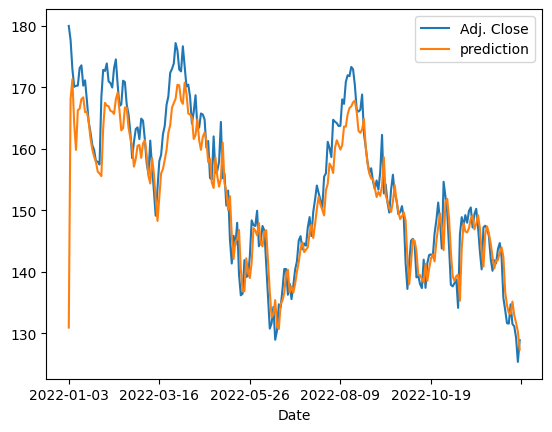

In [ ]:
rnn_predictions_2[1:10]
actual_pred_plot(rnn_predictions_2)

In [ ]:
evaluation_metrics(rnn_predictions_2)

{'Mean Squared Error (MSE)': 26.789817415803903,
 'Mean Absolute Error (MAE)': 3.485067413330078,
 'Root Mean Squared Error (RMSE)': 5.175888079914779,
 'R-squared (R2) Score': 0.8334014014951308}

8/8 [==============================] - 1s 5ms/step


(149.21533, <Axes: xlabel='Date'>)

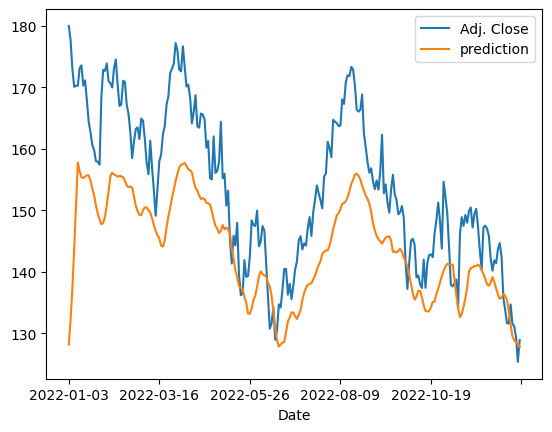

In [ ]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD

    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    history = my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)

In [ ]:
def LSTM_model_regularization(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout
    from keras.optimizers import SGD

    # The LSTM architecture
    LSTM_model = Sequential()
    LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(Dropout(0.2))
    # my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    # my_LSTM_model.add(Dropout(0.2))
    # my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    LSTM_model.add(LSTM(units=50))
    LSTM_model.add(Dropout(0.2))
    LSTM_model.add(Dense(units=2))


    # model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))
    # model.add(Dropout(0.1))
    # model.add(LSTM(units=50))
    # model.add(Dense(2))
    # model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

    # Compiling
    LSTM_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    #LSTM_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')

    # Fitting to the training set
    validation_data = (X_train[-252:], y_train[-252:])
    LSTM_model.fit(X_train,y_train,epochs=60,batch_size=21,validation_data= validation_data)

    LSTM_prediction = LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

In [ ]:
my_LSTM_model, LSTM_prediction = LSTM_model_regularization(X_train, y_train, X_test, sc)

Epoch 1/60
48/48 [==============================] - 8s 38ms/step - loss: 0.0181 - mean_absolute_error: 0.0819 - val_loss: 0.0029 - val_mean_absolute_error: 0.0446
Epoch 2/60
48/48 [==============================] - 1s 18ms/step - loss: 0.0031 - mean_absolute_error: 0.0345 - val_loss: 0.0069 - val_mean_absolute_error: 0.0728
Epoch 3/60
48/48 [==============================] - 1s 18ms/step - loss: 0.0028 - mean_absolute_error: 0.0342 - val_loss: 0.0025 - val_mean_absolute_error: 0.0404
Epoch 4/60
48/48 [==============================] - 1s 18ms/step - loss: 0.0026 - mean_absolute_error: 0.0337 - val_loss: 0.0028 - val_mean_absolute_error: 0.0431
Epoch 5/60
48/48 [==============================] - 1s 20ms/step - loss: 0.0022 - mean_absolute_error: 0.0289 - val_loss: 0.0029 - val_mean_absolute_error: 0.0412
Epoch 6/60
48/48 [==============================] - 1s 18ms/step - loss: 0.0019 - mean_absolute_error: 0.0285 - val_loss: 0.0021 - val_mean_absolute_error: 0.0341
Epoch 7/60
48/48 [====

In [ ]:
my_LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dropout_6 (Dropout)         (None, 2)                 0         
                                                                 
 dropout_12 (Dropout)        (None, 2)                 0         
                                                                 
 dropout_18 (Dropout)        (None, 2)                

(29.204702, <Axes: xlabel='Date'>)

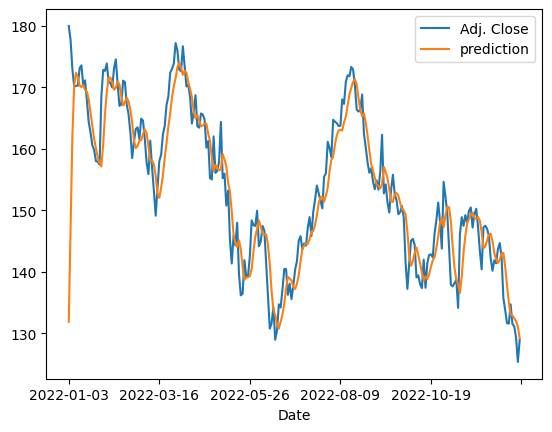

In [ ]:
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)

In [ ]:
evaluation_metrics(LSTM_prediction)

{'Mean Squared Error (MSE)': 29.204705402842023,
 'Mean Absolute Error (MAE)': 3.5279639587402345,
 'Root Mean Squared Error (RMSE)': 5.404137803835319,
 'R-squared (R2) Score': 0.8183838689773668}

In [ ]:
def GRU_model_function(X_train, y_train, X_test, sc):

    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    from keras.layers import Dropout

    # The GRU architecture
    GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    GRU_model.add(Dropout(0.2))
    # Second GRU layer
    GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    GRU_model.add(Dropout(0.2))

    # Third GRU layer
    GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    GRU_model.add(Dropout(0.2))
    # Fourth GRU layer
    GRU_model.add(GRU(units=50, activation='tanh'))
    GRU_model.add(Dropout(0.2))
    # The output layer
    GRU_model.add(Dense(units=2))
    # Compiling the RNN

    validation_data = (X_train[-252:], y_train[-252:])
    GRU_model.compile(optimizer='adam',loss='mean_squared_error')
    # Fitting to the training set
    history = GRU_model.fit(X_train,y_train,epochs=60,batch_size=21,validation_data=validation_data)

    GRU_predictions = GRU_model.predict(X_test)
    GRU_predictions = sc.inverse_transform(GRU_predictions)

    return GRU_model, GRU_predictions, history

In [ ]:
GRU_model, GRU_predictions, history = GRU_model_function(X_train, y_train, X_test, sc)

Epoch 1/60
48/48 [==============================] - 12s 46ms/step - loss: 0.0222 - val_loss: 0.0034
Epoch 2/60
48/48 [==============================] - 1s 19ms/step - loss: 0.0043 - val_loss: 0.0076
Epoch 3/60
48/48 [==============================] - 1s 23ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 4/60
48/48 [==============================] - 1s 23ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 5/60
48/48 [==============================] - 1s 19ms/step - loss: 0.0028 - val_loss: 0.0066
Epoch 6/60
48/48 [==============================] - 1s 16ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 7/60
48/48 [==============================] - 1s 15ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 8/60
48/48 [==============================] - 1s 15ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 9/60
48/48 [==============================] - 1s 15ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 10/60
48/48 [==============================] - 1s 15ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 11

In [ ]:
GRU_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 50)             7950      
                                                                 
 dropout_2 (Dropout)         (None, 5, 50)             0         
                                                                 
 gru_1 (GRU)                 (None, 5, 50)             15300     
                                                                 
 dropout_3 (Dropout)         (None, 5, 50)             0         
                                                                 
 gru_2 (GRU)                 (None, 5, 50)             15300     
                                                                 
 dropout_4 (Dropout)         (None, 5, 50)             0         
                                                                 
 gru_3 (GRU)                 (None, 50)               

(41.481655, <Axes: xlabel='Date'>)

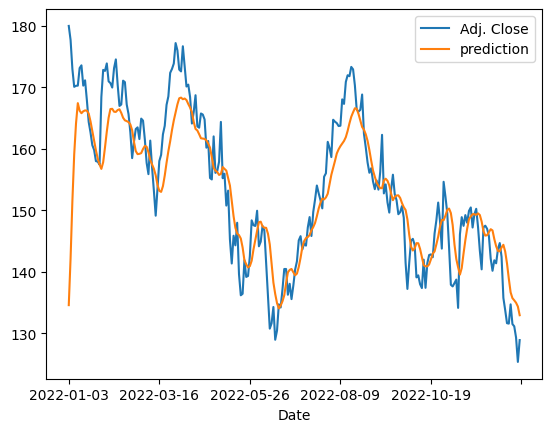

In [ ]:
GRU_predictions[1:10]
actual_pred_plot(GRU_predictions)

In [ ]:
evaluation_metrics(GRU_predictions)

{'Mean Squared Error (MSE)': 41.481656364682365,
 'Mean Absolute Error (MAE)': 4.45510678100586,
 'Root Mean Squared Error (RMSE)': 6.440625463779304,
 'R-squared (R2) Score': 0.7420368453149724}

# Evaluating the neural networks by changes in the lag

In this section, the effect of chaning the number of lagged time periods used to predict the stock price a given time step is evaluated on the recurrent neural networks. Below a for loop is created to iterate through different lags and the evaluation metrics for each model is recorded at each of these lags.

In [ ]:
window_sizes = [1, 5, 10, 15]
# Arrays to store metric values for each algorithm and window size
metrics_RNN = []
metrics_LSTM = []
metrics_GRU= []

for window_size in window_sizes:
    X_train, y_train, X_test, sc = train_test_split_normalize(stock_data,window_size,1)

    # Call your machine learning algorithms
    my_rnn_model, rnn_predictions_2 = rnn_model(X_train, y_train, X_test, sc)
    my_LSTM_model, LSTM_prediction = LSTM_model_regularization(X_train, y_train, X_test, sc)
    GRU_model, GRU_predictions, history = GRU_model_function(X_train, y_train, X_test, sc)

    # Call the evaluation function
    metrics_1 = evaluation_metrics(rnn_predictions_2)
    metrics_2 = evaluation_metrics(LSTM_prediction)
    metrics_3 = evaluation_metrics(GRU_predictions)

    # Append metric values to arrays
    metrics_RNN.append(metrics_1)
    metrics_LSTM.append(metrics_2)
    metrics_GRU.append(metrics_3)

# Convert lists to arrays for easier plotting
metrics_RNN = np.array(metrics_RNN)
metrics_LSTM = np.array(metrics_LSTM)
metrics_GRU = np.array(metrics_GRU)


In [ ]:
metrics_RNN

array([{'Mean Squared Error (MSE)': 26.71648124271934, 'Mean Absolute Error (MAE)': 3.526735809326172, 'Root Mean Squared Error (RMSE)': 5.1687988201050485, 'R-squared (R2) Score': 0.8338574592377413},
       {'Mean Squared Error (MSE)': 25.446734849087196, 'Mean Absolute Error (MAE)': 3.4934318542480467, 'Root Mean Squared Error (RMSE)': 5.044475676330217, 'R-squared (R2) Score': 0.8417536672018514},
       {'Mean Squared Error (MSE)': 43.625812985721275, 'Mean Absolute Error (MAE)': 4.935469268798828, 'Root Mean Squared Error (RMSE)': 6.6049839504514525, 'R-squared (R2) Score': 0.7287029176328341},
       {'Mean Squared Error (MSE)': 101.81352801970695, 'Mean Absolute Error (MAE)': 8.43988491821289, 'Root Mean Squared Error (RMSE)': 10.090268976578718, 'R-squared (R2) Score': 0.36684932138010184}],
      dtype=object)

In [ ]:
metrics_LSTM

array([{'Mean Squared Error (MSE)': 23.569383421045263, 'Mean Absolute Error (MAE)': 3.113624938964844, 'Root Mean Squared Error (RMSE)': 4.854830936401933, 'R-squared (R2) Score': 0.8534284058519326},
       {'Mean Squared Error (MSE)': 54.758862136164915, 'Mean Absolute Error (MAE)': 5.40605990600586, 'Root Mean Squared Error (RMSE)': 7.399923116909048, 'R-squared (R2) Score': 0.6594695086564976},
       {'Mean Squared Error (MSE)': 34.5649439825865, 'Mean Absolute Error (MAE)': 3.9367588806152343, 'Root Mean Squared Error (RMSE)': 5.879195861900375, 'R-squared (R2) Score': 0.7850500010686459},
       {'Mean Squared Error (MSE)': 27.44360439919797, 'Mean Absolute Error (MAE)': 3.5085481872558595, 'Root Mean Squared Error (RMSE)': 5.2386643716884524, 'R-squared (R2) Score': 0.8293356778112537}],
      dtype=object)

In [ ]:
metrics_GRU

array([{'Mean Squared Error (MSE)': 687.3550256127829, 'Mean Absolute Error (MAE)': 23.35898648071289, 'Root Mean Squared Error (RMSE)': 26.217456505404616, 'R-squared (R2) Score': -3.274474221493377},
       {'Mean Squared Error (MSE)': 91.00607137473324, 'Mean Absolute Error (MAE)': 7.505629791259766, 'Root Mean Squared Error (RMSE)': 9.539710235365288, 'R-squared (R2) Score': 0.4340579589945037},
       {'Mean Squared Error (MSE)': 82.56338029726618, 'Mean Absolute Error (MAE)': 7.1297006530761715, 'Root Mean Squared Error (RMSE)': 9.086439362988463, 'R-squared (R2) Score': 0.48656076180516517},
       {'Mean Squared Error (MSE)': 42.82264699295559, 'Mean Absolute Error (MAE)': 4.661392913818359, 'Root Mean Squared Error (RMSE)': 6.543901511556816, 'R-squared (R2) Score': 0.7336975888052699}],
      dtype=object)

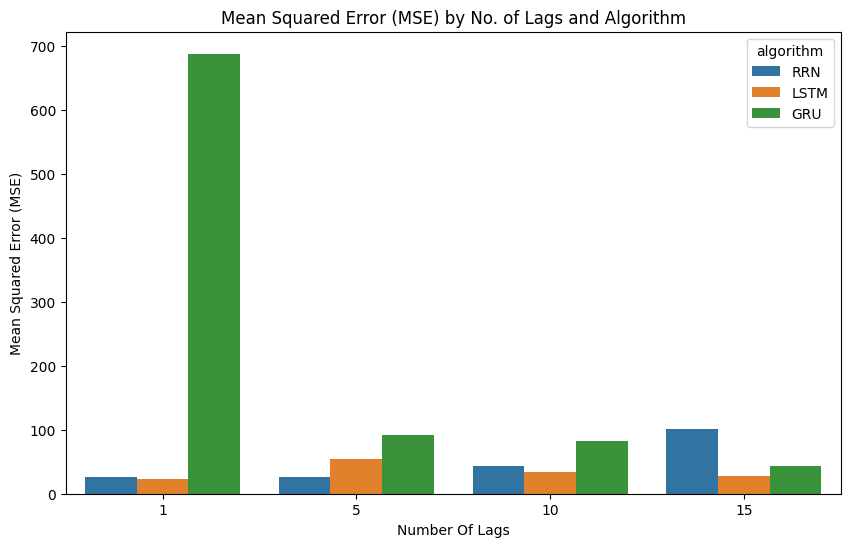

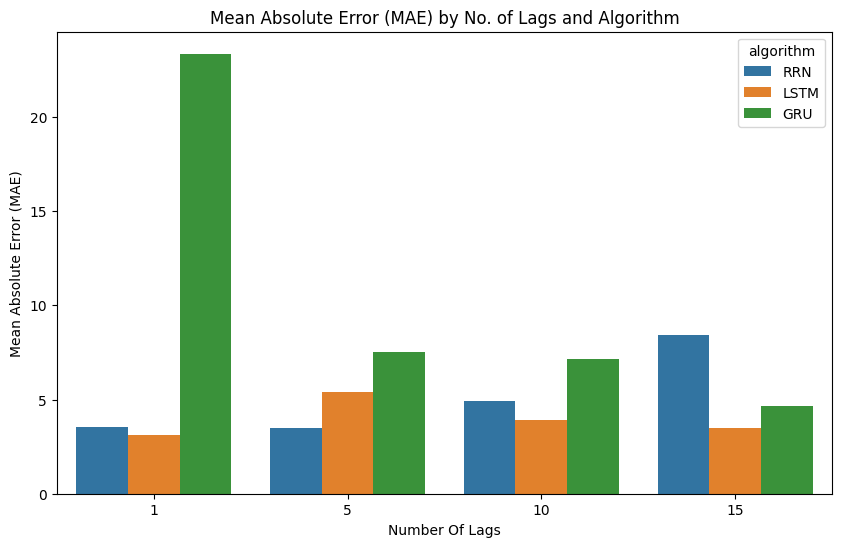

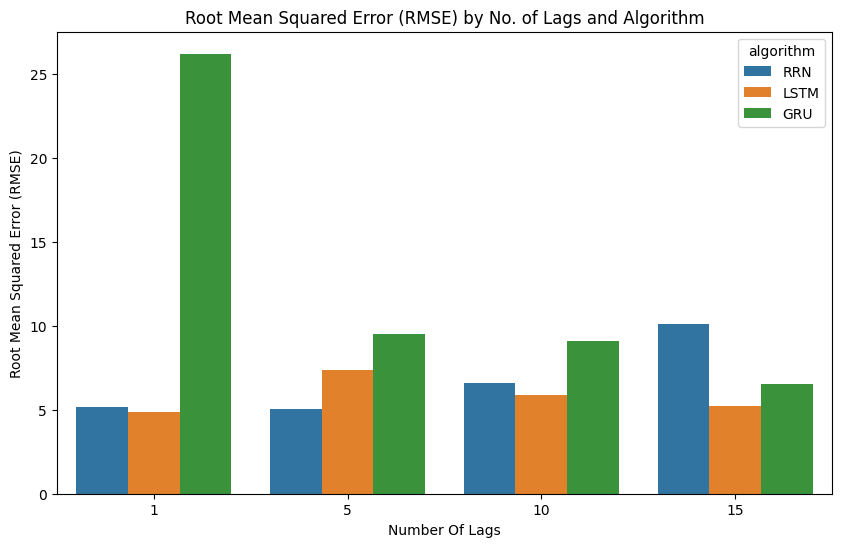

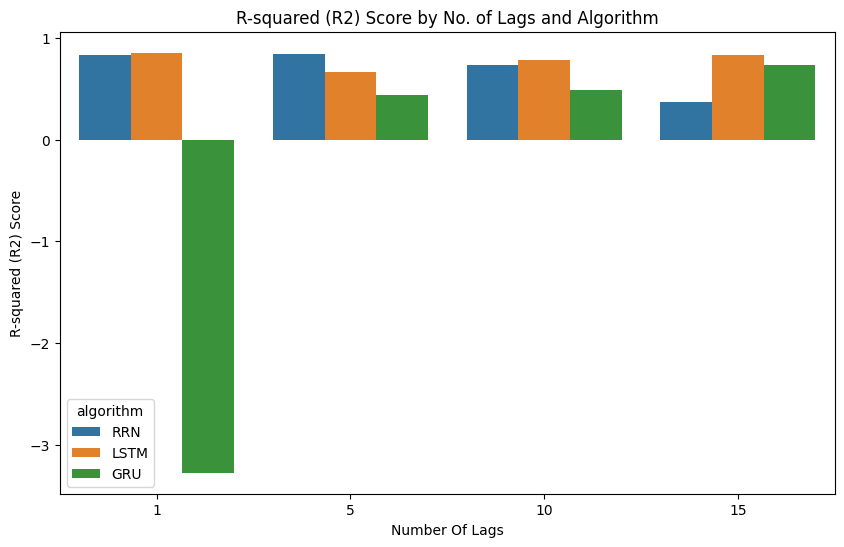

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Your arrays
rrn_array = np.array([{'Mean Squared Error (MSE)': 26.71648124271934, 'Mean Absolute Error (MAE)': 3.526735809326172, 'Root Mean Squared Error (RMSE)': 5.1687988201050485, 'R-squared (R2) Score': 0.8338574592377413},
       {'Mean Squared Error (MSE)': 25.446734849087196, 'Mean Absolute Error (MAE)': 3.4934318542480467, 'Root Mean Squared Error (RMSE)': 5.044475676330217, 'R-squared (R2) Score': 0.8417536672018514},
       {'Mean Squared Error (MSE)': 43.625812985721275, 'Mean Absolute Error (MAE)': 4.935469268798828, 'Root Mean Squared Error (RMSE)': 6.6049839504514525, 'R-squared (R2) Score': 0.7287029176328341},
       {'Mean Squared Error (MSE)': 101.81352801970695, 'Mean Absolute Error (MAE)': 8.43988491821289, 'Root Mean Squared Error (RMSE)': 10.090268976578718, 'R-squared (R2) Score': 0.36684932138010184}],
                  dtype=object)

lstm_array = np.array([{'Mean Squared Error (MSE)': 23.569383421045263, 'Mean Absolute Error (MAE)': 3.113624938964844, 'Root Mean Squared Error (RMSE)': 4.854830936401933, 'R-squared (R2) Score': 0.8534284058519326},
       {'Mean Squared Error (MSE)': 54.758862136164915, 'Mean Absolute Error (MAE)': 5.40605990600586, 'Root Mean Squared Error (RMSE)': 7.399923116909048, 'R-squared (R2) Score': 0.6594695086564976},
       {'Mean Squared Error (MSE)': 34.5649439825865, 'Mean Absolute Error (MAE)': 3.9367588806152343, 'Root Mean Squared Error (RMSE)': 5.879195861900375, 'R-squared (R2) Score': 0.7850500010686459},
       {'Mean Squared Error (MSE)': 27.44360439919797, 'Mean Absolute Error (MAE)': 3.5085481872558595, 'Root Mean Squared Error (RMSE)': 5.2386643716884524, 'R-squared (R2) Score': 0.8293356778112537}],
                  dtype=object)

gru_array = np.array([{'Mean Squared Error (MSE)': 687.3550256127829, 'Mean Absolute Error (MAE)': 23.35898648071289, 'Root Mean Squared Error (RMSE)': 26.217456505404616, 'R-squared (R2) Score': -3.274474221493377},
       {'Mean Squared Error (MSE)': 91.00607137473324, 'Mean Absolute Error (MAE)': 7.505629791259766, 'Root Mean Squared Error (RMSE)': 9.539710235365288, 'R-squared (R2) Score': 0.4340579589945037},
       {'Mean Squared Error (MSE)': 82.56338029726618, 'Mean Absolute Error (MAE)': 7.1297006530761715, 'Root Mean Squared Error (RMSE)': 9.086439362988463, 'R-squared (R2) Score': 0.48656076180516517},
       {'Mean Squared Error (MSE)': 42.82264699295559, 'Mean Absolute Error (MAE)': 4.661392913818359, 'Root Mean Squared Error (RMSE)': 6.543901511556816, 'R-squared (R2) Score': 0.7336975888052699}],
                  dtype=object)

# Create DataFrames
df_rrn = pd.DataFrame.from_records(rrn_array)
df_lstm = pd.DataFrame.from_records(lstm_array)
df_gru = pd.DataFrame.from_records(gru_array)

# Add 'loop' and 'algorithm' columns
df_rrn['loop'] = [1, 5, 10, 15]
df_rrn['algorithm'] = 'RRN'

df_lstm['loop'] = [1, 5, 10, 15]
df_lstm['algorithm'] = 'LSTM'

df_gru['loop'] = [1, 5, 10, 15]
df_gru['algorithm'] = 'GRU'

# Combine DataFrames
df_combined = pd.concat([df_rrn, df_lstm, df_gru], ignore_index=True)

# Define metrics to plot
metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2) Score']

# Plot bar charts for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='loop', y=metric, hue='algorithm', data=df_combined)
    plt.xlabel('Number Of Lags')
    plt.ylabel(metric)
    plt.title(f'{metric} by No. of Lags and Algorithm')
    plt.show()


# DASHBOARD

Streamlit was used to build the dashboard to visualise the stock data. To access the dashboard, a local tunnel is used.

In [ ]:
!pip install -q streamlit==1.20.0
!npm install -q localtunnel
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.646s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audi

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.metrics import MeanSquaredError
# Importing required libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression ,LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN


# Function to get stock data
# @st.cache
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function for time series training, testing, and normalization
def ts_train_test_normalize(all_data,time_steps,for_periods):

    # create training and test set using 2017 - Dec 2021 as training data and 2022-2023 as the test data
    ts_train = all_data[:'2021'].iloc[:,0:1].values
    ts_test  = all_data['2022':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1):
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2021'], all_data["Adj Close"]['2022':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

# Function for actual vs predicted plot
def actual_pred_plot(preds, actual_data):
    m = MeanSquaredError()
    m.update_state(np.array(actual_data['Adj. Close']), np.array(preds[:, 0]))
    st.write(f"Mean Squared Error: {m.result().numpy()}")

    st.line_chart(actual_data[['Adj. Close', 'prediction']])

# Streamlit App
st.title('Stock Price Prediction Dashboard')
# Sidebar for user input
st.sidebar.header('User Input Parameters')

# Dropdown for selecting stock sector
stock_sectors = ['Technology', 'Finance', 'Healthcare']  # Add more sectors as needed
selected_sector = st.sidebar.selectbox("Select Stock Sector", stock_sectors)

# Use the selected sector to filter stocks
stocks_in_sector = {
    'Technology': ['AAPL', 'GOOGL', 'MSFT'],
    'Finance': ['JPM', 'GS', 'BAC'],
    'Healthcare': ['PFE', 'JNJ', 'MRK']
}

# Dropdown for selecting specific stock within the chosen sector
selected_stock = st.sidebar.selectbox(f"Select {selected_sector} Stock", stocks_in_sector[selected_sector])

start_date = st.sidebar.text_input("Enter Start Date (YYYY-MM-DD)", "2017-01-01")
end_date = st.sidebar.text_input("Enter End Date (YYYY-MM-DD)", "2023-01-01")

# Get stock data
all_data = get_stock_data(selected_stock, start_date, end_date)

# Sidebar for model parameters
time_steps = st.sidebar.slider("Select Time Steps", min_value=1, max_value=30, value=5)
for_periods = st.sidebar.slider("Select Forecast Periods", min_value=1, max_value=2, value=1)

# Train and test the model
X_train, y_train, X_test, sc = ts_train_test_normalize(all_data, time_steps, for_periods)

# Reshape data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

# New line chart for historical closing prices
st.header(f'Historical Closing Prices for {selected_stock}')
st.line_chart(all_data['Adj Close'])

# New line chart for moving averages
st.header(f'Moving Averages for {selected_stock}')

# Slider for selecting the window size
window_size = st.slider("Select Moving Average Window Size", min_value=1, max_value=50, value=20)

# Calculate Simple Moving Average (SMA)
all_data['SMA'] = all_data['Adj Close'].rolling(window=window_size).mean()

# Calculate Bollinger Bands for SMA
all_data['Upper Band'] = all_data['SMA'] + 2 * all_data['Adj Close'].rolling(window=window_size).std()
all_data['Lower Band'] = all_data['SMA'] - 2 * all_data['Adj Close'].rolling(window=window_size).std()

# Plotting the moving averages with Bollinger Bands
st.header(f'Moving Averages with Bollinger Bands for {selected_stock}')

# Plotting the moving averages with Bollinger Bands
st.line_chart(all_data[['SMA', 'Upper Band', 'Lower Band']])

st.header('Basic Information about the Stock')

# Get additional information about the stock
stock_info = yf.Ticker(selected_stock)

# Create two columns for better organization
col1, col2 = st.columns(2)

# Display financial ratios in the first column
with col1:
    st.subheader('Financial Ratios')
    st.write(f"**P/E Ratio:** {stock_info.info.get('trailingPE', 'N/A')}")
    st.write(f"**ROE:** {stock_info.info.get('returnOnEquity', 'N/A')}")
    st.write(f"**Debt/Equity Ratio:** {stock_info.info.get('debtToEquity', 'N/A')}")
    st.write(f"**Current Ratio:** {stock_info.info.get('currentRatio', 'N/A')}")
    st.write(f"**Dividend Yield:** {stock_info.info.get('dividendYield', 'N/A')}")

# Display 52-week high and low in the second column
with col2:
    st.subheader('52-Week High/Low')
    st.write(f"**52-Week High:** {stock_info.info.get('fiftyTwoWeekHigh', 'N/A')}")
    st.write(f"**52-Week Low:** {stock_info.info.get('fiftyTwoWeekLow', 'N/A')}")

st.header('Predictions for upcoming year')
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform predictions
y_pred = sc.inverse_transform(y_pred)

# Prepare actual vs predicted data for plotting
actual_pred = pd.DataFrame(columns=['Adj. Close', 'prediction'])
actual_pred['Adj. Close'] = all_data.loc['2022':, 'Adj Close'][0:len(y_pred)]
actual_pred['prediction'] = y_pred[:, 0]

# Display actual vs predicted plot
actual_pred_plot(y_pred, actual_pred)

# Sidebar for log returns comparison
st.sidebar.header('Log Returns Comparison')
compare_log_returns = st.sidebar.checkbox("Compare Log Returns", value=False)

if compare_log_returns:
    st.header('Log Returns Comparison')

    # Get stock data for selected sector
    sector_stocks = stocks_in_sector[selected_sector]
    sector_data = yf.download(sector_stocks, start=start_date, end=end_date)['Adj Close']

    # Calculate log returns
    log_returns = np.log(sector_data / sector_data.shift(1))

    # Plot log returns
    st.line_chart(log_returns)
import seaborn as sns

# ...

# Sidebar option to display the violin plot
compare_volatility = st.sidebar.checkbox("Compare Volatility (Violin Plot)", value=False)

if compare_volatility:
    st.header('Volatility Comparison')

    # Get stock data for selected sector
    sector_stocks = stocks_in_sector[selected_sector]
    sector_data = yf.download(sector_stocks, start=start_date, end=end_date)['Adj Close']

    # Calculate log returns for each stock in the sector
    log_returns = np.log(sector_data / sector_data.shift(1))

    # Reshape data for violin plot
    log_returns_melted = pd.melt(log_returns, var_name='Stock', value_name='Log Returns')

    # Create a violin plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    sns.violinplot(x='Stock', y='Log Returns', data=log_returns_melted, ax=ax1)
    ax1.set_title('Log Returns (Violin Plot)')

    # Calculate yearly volatility
    yearly_volatility = log_returns.groupby(log_returns.index.year).std() * np.sqrt(252)  # Assuming 252 trading days in a year

    # Plot yearly volatility
    yearly_volatility.plot(kind='bar', ax=ax2)
    ax2.set_title('Yearly Volatility')

    st.pyplot(fig)

# ...

# ...

def get_financial_ratios(ticker):
    stock_info = yf.Ticker(ticker)
    ratios = {
        'P/E Ratio': stock_info.info.get('trailingPE', None),
        'ROE': stock_info.info.get('returnOnEquity', None),
        'Debt/Equity Ratio': stock_info.info.get('debtToEquity', None),
        'Current Ratio': stock_info.info.get('currentRatio', None),
        'Dividend Yield': stock_info.info.get('dividendYield', None),
    }
    return ratios

financial_ratios = get_financial_ratios(selected_stock)

# Sidebar option to display financial ratios comparison for the sector
compare_sector_financial_ratios = st.sidebar.checkbox("Compare Sector Financial Ratios", value=False)

if compare_sector_financial_ratios:
    st.header(f'Financial Ratios Comparison for {selected_sector}')

    # Get financial ratios for all stocks in the selected sector
    sector_stocks = stocks_in_sector[selected_sector]
    sector_ratios = {stock: get_financial_ratios(stock) for stock in sector_stocks}

    # Filter out stocks without financial ratios
    valid_sector_ratios = {stock: ratios for stock, ratios in sector_ratios.items() if all(value is not None for value in ratios.values())}
    skipped_stocks = set(sector_stocks) - set(valid_sector_ratios.keys())

    # Check if data is available for any stock in the sector
    if valid_sector_ratios:

        # Create a bar plot for each ratio, comparing stocks in the sector
        fig, axes = plt.subplots(1, 5, figsize=(25, 8))

        for i, ratio in enumerate(financial_ratios.keys()):
            values = [ratios[ratio] for ratios in valid_sector_ratios.values()]
            stocks = list(valid_sector_ratios.keys())

            axes[i].bar(stocks, values, color='skyblue')
            axes[i].set_title(f'{ratio} Comparison in {selected_sector}')
            axes[i].set_ylabel(ratio)

        # Display warning for skipped stocks
        if skipped_stocks:
            st.warning(f"Financial ratios data not available for the following stocks in {selected_sector}: {', '.join(skipped_stocks)}")

        # Adjust layout
        plt.tight_layout()

        st.pyplot(fig)

    else:
        st.warning(f"Financial ratios data not available for any stock in {selected_sector}.")


Writing app.py


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &
!npx localtunnel --port 8501 &>/content/localtunnel.txt &

The streamlit application is accessed by following the link in the localtunnel.txt file and using the external port number provided in the logs.txt file.